<a href="https://colab.research.google.com/github/blackJJW/ML/blob/main/self_study_ML/chapter1_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book : '혼자 공부하는 머신러닝 + 딥러닝', 박해선 지음, 한빛미디어

# 01-3 마켓과 머신러닝
- 간단한 머신러닝 알고리즘 중 하나인 k-최근접 이웃을 사용, 2개의 종류를 분류하는 머신러닝 모델을 훈련

## 생선 분류 문제
- 생선 종류 : '도미', '곤들메기', '농어', '강꼬치고기', '로치', '빙어', '송어'
- 생선 길이 30cm 이상 -> '도미'



```
if fish_length >= 30:
  print('도미')
```
- 30cm 이상이 꼭 '도미'라고 말할 수 없음
- 절대 바뀌지 않은 기준 정하기 어려움
- 머신러닝은 스스로 기준을 찾아서 일을 함


### 도미 데이터 준비
- 머신러닝은 여러 개의 도미 생선을 보면 스스로 어떤 생선이 도미인지를 구분할 기준을 찾음
- 간단한 문제부터 해결 필요
> 이진 분류
  - 머신러닝에서 여러 개의 종류(혹은 클래스(class)) 중 하나를 구별해 내는 문제를 분류(classification)
  - 2개의 클래스 중 하나를 고르는 문제를 이진 분류(binary classification)




In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

- 도미 데이터(35마리)
- 도미의 특징을 길이와 무게로 표현 -> 이런 특징 -> 특성(feature)
- 특성(feature) : 데이터의 특징
- 그래프 이용 시 더 잘 이해 가능
- 산점도(catter plot): x, y축으로 이뤄진 좌표계에 두 변수(x, y)의 관계를 표현하는 방법
- Python 과학계산용 그래프 패키지 : matplotlib

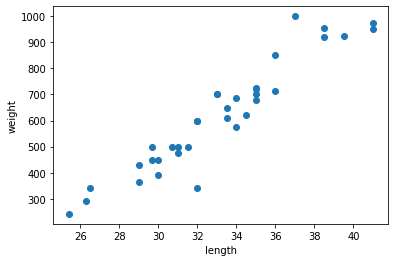

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 산점도의 그래프가 일직선에 가까운 형태로 나타나는 경우를 선형(linear)적이라고 함

### 빙어 데이터 준비
- 빙어 데이터(14마리)

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

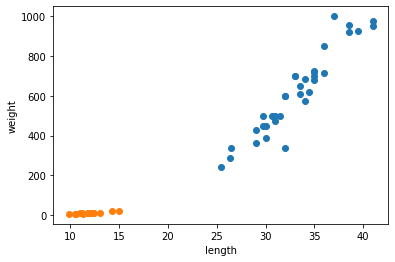

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램
- 가장 간단하고 이해가기 쉬운 k-최근접(k-Nearest Neighbors) 알고리즘을 사용, 도미와 빙어를 구분
- 알고리즘 사용 전, 도미와 빙어 데이터를 하나의 데이터로 합침

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

- 사용하는 패키지 : 사이킷 런(scikit-learn)
- 이 패키지를 사용하려면 2차원 리스트 필요
- 파이썬의 zip() 함수와 리스트 내포(list comprehension)구문 사용
- zip()함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환

In [6]:
fish_data = [[l, w] for l, w in zip(length, weight)]

> zip() 함수와 for문
  - zip() : 나열된 리스트에서 원소를 하나씩 꺼내주는 일을 함
  - for : 반복문

In [7]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


- 도미 = 1, 빙어 = 0

In [9]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
# KNeighborsClassifier 임포트
from sklearn.neighbors import KNeighborsClassifier

> from ~ import 구문
  - 파이썬에서 패키지나 모듈 전체를 임포트하지 않고 특정 클래스만 임포트하려면 from~import 구문을 사용

In [11]:
# 임포트한 KNeighborsClassifier 클래스의 객체 생성
kn = KNeighborsClassifier()

- fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습 -> 이런 과정을 머신러닝에서는 훈련(training)
- 훈련(training) : 모델에 데이터를 전달하여 규칙을 학습하는 과정
- 사이킷 런에는 fit()메서드가 존재 -> 훈련 역할

In [12]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

- fit() 메서드는 주어진 데이터로 알고리즘을 훈련
- 훈련 평가 : 사이킷 런에서 score() 메서드 이용 -> 0 ~ 1 값 반환

> 머신러닝에서의 모델
  - 머신러닝 알고리즘을 구현한 프로그램을 모델(model)이라고 부름
  - 프로그매이 아니더라도 알고리즘을 (수식 등) 구체화하여 표현한 것을 모델이라고 부름

In [13]:
kn.score(fish_data, fish_target)

1.0

- 이 값을 정확도(accuracy)라고 부름

### k-최근접 이웃 알고리즘
- 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용

In [15]:
kn.predict([[20, 600]])

array([1])

- predict() : 새로운 데이터의 정답을 예측
- fit()과 마찬가지로 2중 리스트로 전달
- 새로운 데이터에 대한 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는 지를 살피기만 하면 됨
- 단점 : 데이터가 많은 경우에는 사용하기 어려움, 데이터가 크기 때문에 메모리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간이 필요

- 사이킷 런의 KNeighborsClassifier 클래스에는 _fit_X 속성에 우리가 전달한 fish_data를 모두 가지고 있음
- _y속성에 fish_target을 가지고 있음

In [16]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [17]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


- k-최근접 이웃 알고리즘은 무언가 훈련되는 거싱 없는 셈
- fit() 메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 구분
- 몇 개의 데이터를 참고? -> 기본값 = 5 -> 매개변수 변경 가능

In [18]:
kn49 = KNeighborsClassifier(n_neighbors=49)

- 가장 가까운 데이터 49개를 사용하는 k-최근접 이웃 모델에 fish_data를 적용하면 fish_data에 있는 모든 생선을 사용하여 예측
- 49개 중에 도미가 35개로 다수를 차지하므로 어떤 데이터를 넣어도 무조건 도미로 예측

In [19]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [20]:
print(35/49)

0.7142857142857143


## 도미와 빙어 분류
### 전체 소스 코드

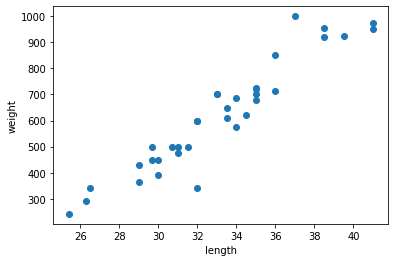

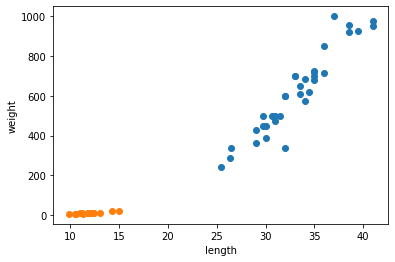

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


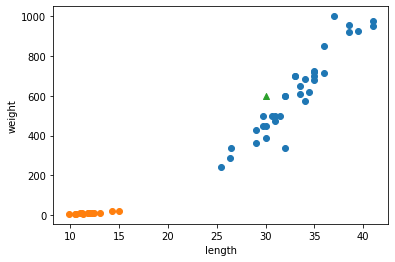

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
0.7142857142857143


In [21]:
"""# 마켓과 머신러닝"""
"""## 생선 분류 문제"""
"""### 도미 데이터 준비하기"""

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

"""### 빙어 데이터 준비하기"""
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

"""## 첫 번째 머신러닝 프로그램"""
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

fish_target = [1] * 35 + [0] * 14
print(fish_target)

kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)

kn.score(fish_data,fish_target)

"""### k-최근접 이웃 알고리즘"""
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.predict([[30, 600]])

print(kn._fit_X)

print(kn._y)

kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

print(35/49)

## 마무리

### 키워드로 끝내는 핵심 포인트
- 특성은 데이터를 표현하는 하나의 성질
- 머신러닝 알고리즘이 데이터에서 규칙을 찾는 과정을 훈련(training) -> 사이킷 런에는 fit()
- k-최근접 이웃 알고리즘은 가장 간단한 머신러닝 알고리즘 중 하나. 어떤 규칙을 찾기보다는 전체 데이터를 메모리에 가지고 있는 것이 전부
- 머신러닝 프로그램에서는 알고리즘이 구현된 객체를 모델. 종종 알고리즘 자체를 모델이라 부르기도 함
- 정확도는 정확한 답을 몇 개 맞혔는 지를 백분율로 나타낸 값. 사이킷 런에서는 0~1의 값으로 출력

> 정확도 = (정확히 맞힌 개수) / (전체 데이터 개수)

### 핵심 패키지와 함수

1. matplotlib
> scatter()
  - 산점도를 그리는 함수
  - c매개변수로 색상 지정 - 'b'(파랑), 'g'(초록), 'r'(빨강), 'c'(시안), 'm'(마젠타), 'y'(노랑), 'k'(검정), 'w'(흰색) 등
  - marker 매개변수로 마커 스타일 
  
2. scikit-learn   

> 1. KNeighborsClassifier()
  - k-최근접 이웃 분류 모델을 만드는 사이킷 런 클래스
  - n_neighbors 매개변수로 이웃의 개수를 지정. 기본값 = 5
  - p 매개변수로 거리를 재는 방법을 지정 - 1일 경우 맨해튼 거리를 사용, 2일 경우 유클리디안 거리 사용. 기본값 = 2
  - n_jobs 매개변수로 사용할 CPU 코어를 지정. -  -1로 설정시 모든 CPU 코어를 사용. 이웃 간의 거리 계산 속도들 높일 수 있었지만 fit() 메서드에는 영향이 없다. 기본값 = 1

> 2. fit()
  - 사이킷 런 모델을 훈련할 때 사용하는 메서드. 처음 두 매개변수로 훈련에 사용할 특성과 정답 데이터를 전달



>  3. predict()
  - 사이킷런 모델을 훈련하고 예측할 때 사용하는 메서드. 특성 데이터 하나만 매개변수로 받는다. 


>  4. score()
  - 훈련된 사이킷런 모델의 성능을 측정. 처음 두 매개변수로 특성과 정답 데이터를 전달. 이 메서드는 먼저 predict() 메서드로 예측을 수행한 다음 분류 모델일 경우 정답과 비교하여 올바르게 예측한 개수의 비율을 반환